## Discrete optimization by evotorch

In [24]:
import evotorch as et
from evotorch.algorithms import GeneticAlgorithm
from evotorch.operators import CrossOver, Operator
from evotorch.operators import OnePointCrossOver 
from evotorch.operators import TwoPointCrossOver
from evotorch.logging import StdOutLogger, PandasLogger
import torch
import matplotlib.pyplot as plt

In [ ]:
# Custom function
class TwoPointCrossOver(Operator):
    def __init__(self, problem, probability=0.7):
        super().__init__(problem)
        self.probability = probability

    def _do(self, batch):
        population = batch.access_values()
        num_individuals = population.shape[0]
        num_genes = population.shape[1]

        new_population = population.clone()

        for i in range(0, num_individuals, 2):
            if i + 1 >= num_individuals:
                break

            if torch.rand(1).item() < self.probability:
                # Perform two-point crossover
                crossover_points = torch.sort(torch.randint(1, num_genes, (2,)))[0]
                p1, p2 = crossover_points[0].item(), crossover_points[1].item()

                new_population[i, p1:p2], new_population[i+1, p1:p2] = (
                    population[i+1, p1:p2],
                    population[i, p1:p2]
                )

        batch.set_values(new_population)

In [20]:
# 예시 목적 함수 (간단한 이산 문제)
def simple_fitness(x: torch.Tensor) -> torch.Tensor:
    return torch.sum(x, dim=1)  # 예시로서 모든 요소의 합을 최대화

# 문제 정의
problem = et.Problem(
    "max",  # 최대화 문제
    simple_fitness,
    initial_bounds=(0, 1),  # 이진 문제를 위한 경계 (0 또는 1)
    solution_length=10,  # 각 솔루션의 길이
    vectorized=True,
    dtype=torch.int  #####
)

# 유전자 알고리즘 정의
searcher = GeneticAlgorithm(
    problem,
    popsize=100,  # 인구 크기
    operators=[
        #TwoPointCrossOver(problem, probability=0.7),  # custom function ok
        TwoPointCrossOver(problem, tournament_size=4),  # lib ok
        #OnePointCrossOver(problem, tournament_size=4),  # lib ok
    ],
)

[2024-08-18 09:01:30] INFO     <36184> evotorch.core: Instance of `Problem` (id:1725760028576) -- The `dtype` for the problem's decision variables is set as torch.int32
[2024-08-18 09:01:30] INFO     <36184> evotorch.core: Instance of `Problem` (id:1725760028576) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2024-08-18 09:01:30] INFO     <36184> evotorch.core: Instance of `Problem` (id:1725760028576) -- The `device` of the problem is set as cpu
[2024-08-18 09:01:30] INFO     <36184> evotorch.core: Instance of `Problem` (id:1725760028576) -- The number of actors that will be allocated for parallelized evaluation is 0


         iter : 10
pop_best_eval : 10.0
    mean_eval : 10.0
  median_eval : 10.0
    best_eval : 10.0
   worst_eval : 1.0

         iter : 20
pop_best_eval : 10.0
    mean_eval : 10.0
  median_eval : 10.0
    best_eval : 10.0
   worst_eval : 1.0

ReadOnlyTensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int32)


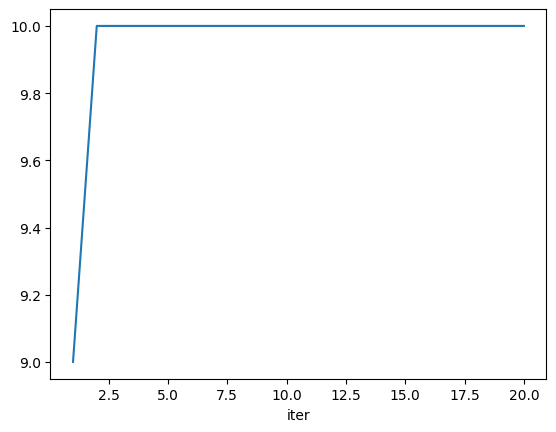

In [21]:
# 표준 출력 로거 및 판다스 로거 초기화
_ = StdOutLogger(searcher, interval=10)
pandas_logger = PandasLogger(searcher)

# 유전자 알고리즘 실행
searcher.run(20)

print(searcher.status["best"].values)
# 결과 로그를 시각화
pandas_frame = pandas_logger.to_dataframe()
pandas_frame["best_eval"].plot()
plt.show()

In [23]:
# Define the fitness function
def simple_fitness(x: torch.Tensor) -> torch.Tensor:
    return torch.sum(x, dim=1)  # Sum of the elements


# Define the problem
problem = et.Problem(
    "max",
    simple_fitness,
    initial_bounds=(0, 1),
    solution_length=10,
    vectorized=True,
    dtype=torch.bool  #######
)

# Initialize the genetic algorithm
searcher = GeneticAlgorithm(
    problem,
    popsize=100,
    #operators=[TwoPointCrossOver(problem, probability=0.7)],
    operators=[TwoPointCrossOver(problem, tournament_size=4)],
)

# # Set up logging
_ = StdOutLogger(searcher, interval=10)
pandas_logger = PandasLogger(searcher)

# Run the genetic algorithm
searcher.run(10)

searcher.status["best"].values, searcher.status["best_eval"]

[2024-08-18 09:48:49] INFO     <36184> evotorch.core: Instance of `Problem` (id:1725856486880) -- The `dtype` for the problem's decision variables is set as torch.bool
[2024-08-18 09:48:49] INFO     <36184> evotorch.core: Instance of `Problem` (id:1725856486880) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2024-08-18 09:48:49] INFO     <36184> evotorch.core: Instance of `Problem` (id:1725856486880) -- The `device` of the problem is set as cpu
[2024-08-18 09:48:49] INFO     <36184> evotorch.core: Instance of `Problem` (id:1725856486880) -- The number of actors that will be allocated for parallelized evaluation is 0
         iter : 10
pop_best_eval : 10.0
    mean_eval : 10.0
  median_eval : 10.0
    best_eval : 10.0
   worst_eval : 1.0



(ReadOnlyTensor([True, True, True, True, True, True, True, True, True, True]),
 10.0)